In [4]:
!pip install catboost

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier


In [6]:
df = pd.read_csv('/content/sri_lankan_classified_ads_matching_dataset_v1.csv', encoding='latin-1')

In [7]:
df.head()

,offering_ad,wanted_ad,category_1,category_2,offering_ad_title,offering_ad_description,wanted_ad_title,wanted_ad_description
0,Ground Floor House for Rent in Colombo 9. Addr...,Looking for a ground floor house for rent in t...,Property,house,Ground Floor House for Rent in Colombo 9. Addr...,Ground Floor House for Rent in Colombo 9. ====...,Looking for a ground floor house for rent in t...,"Budget around 70,000 LKR."
1,?? ?????? ???????? ????? House Sale Meegoda. A...,Looking to buy a house in the Meegoda or Homag...,Property,house,?? ?????? ???????? ????? House Sale Meegoda,"Address: Homagama ,Meegoda ., Bedrooms: 3, Bat...",Looking to buy a house in the Meegoda or Homag...,Around 3 bedrooms would be great. Close to NSB...
2,03 Story House With 08 P Sale At Rawathawatha ...,"Seeking a house around Rawathawatta, Moratuwa....",Property,commercial property,03 Story House With 08 P Sale At Rawathawatha ...,"Property type: Other, Address: Rawathawatha Mo...","Seeking a house around Rawathawatta, Moratuwa",Ideally a two- or three-story house with 4 bed...
3,Mini Apartment Concept - 2 Floors Completed Wi...,Interested in purchasing a property with multi...,Property,commercial property,Mini Apartment Concept - 2 Floors Completed Wi...,"Property type: Building, Address: Templers Roa...",Interested in purchasing a property with multi...,Interested in purchasing a property with multi...
4,"land for sale in homagama. Address: Homagama ,...","Looking for a block of land around Homagama, p...",Property,land,land for sale in homagama,"Address: Homagama , Land type: Residential, La...","Looking for a block of land around Homagama, p...","Looking for a block of land around Homagama, p..."


In [19]:
mask = df.astype(str).apply(lambda x: x.str.contains('\\?', na=False)).any(axis=1)

df = df[~mask]

display(df.head())
df.to_csv('cleaned_sri_lankan_classified_ads_matching_dataset.csv', index=False)

,offering_ad,wanted_ad,category_1,category_2,offering_ad_title,offering_ad_description,wanted_ad_title,wanted_ad_description,text_features
0,Ground Floor House for Rent in Colombo 9. Addr...,Looking for a ground floor house for rent in t...,Property,house,Ground Floor House for Rent in Colombo 9. Addr...,Ground Floor House for Rent in Colombo 9. ====...,Looking for a ground floor house for rent in t...,"Budget around 70,000 LKR.",Ground Floor House for Rent in Colombo 9. Addr...
2,03 Story House With 08 P Sale At Rawathawatha ...,"Seeking a house around Rawathawatta, Moratuwa....",Property,commercial property,03 Story House With 08 P Sale At Rawathawatha ...,"Property type: Other, Address: Rawathawatha Mo...","Seeking a house around Rawathawatta, Moratuwa",Ideally a two- or three-story house with 4 bed...,03 Story House With 08 P Sale At Rawathawatha ...
3,Mini Apartment Concept - 2 Floors Completed Wi...,Interested in purchasing a property with multi...,Property,commercial property,Mini Apartment Concept - 2 Floors Completed Wi...,"Property type: Building, Address: Templers Roa...",Interested in purchasing a property with multi...,Interested in purchasing a property with multi...,Mini Apartment Concept - 2 Floors Completed Wi...
6,"Room for Rent in Madiwela, Kotte. Property typ...","Seeking a room for rent in Madiwela, Kotte, su...",Property,room & annex,"Room for Rent in Madiwela, Kotte","Property type: Portion, Address: No.23/3, Mand...","Seeking a room for rent in Madiwela, Kotte, su...","Seeking a room for rent in Madiwela, Kotte, su...","Room for Rent in Madiwela, Kotte Property type..."
7,Colombo 08 - Fully Furnished Apartment for sal...,Looking for a fully furnished apartment in Col...,Property,apartment,Colombo 08 - Fully Furnished Apartment for sale,"Address: Colombo 08, Bedrooms: 3, Bathrooms: 2...",Looking for a fully furnished apartment in Col...,3 bedrooms ideal.,Colombo 08 - Fully Furnished Apartment for sal...


## Data preparation




In [9]:
df['text_features'] = df['offering_ad_title'].fillna('') + ' ' + \
                      df['offering_ad_description'].fillna('') + ' ' + \
                      df['wanted_ad_title'].fillna('') + ' ' + \
                      df['wanted_ad_description'].fillna('')

X = df['text_features']
y = df['category_2']

display(X.head())
display(y.head())

,text_features
0,Ground Floor House for Rent in Colombo 9. Addr...
2,03 Story House With 08 P Sale At Rawathawatha ...
3,Mini Apartment Concept - 2 Floors Completed Wi...
6,"Room for Rent in Madiwela, Kotte Property type..."
7,Colombo 08 - Fully Furnished Apartment for sal...


,category_2
0,house
2,commercial property
3,commercial property
6,room & annex
7,apartment


## Handle categorical target variable



In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

display(y[:5])

array([14, 13, 13, 17,  9])

## Data splitting




In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11660,)
Shape of X_test: (2915,)
Shape of y_train: (11660,)
Shape of y_test: (2915,)


## Catboost model initialization



In [12]:
catboost_model = CatBoostClassifier(text_features=['text_features'], random_state=42, verbose=0)

## Model training



In [14]:
from re import VERBOSE
# Convert X_train and X_test Series to DataFrames with a column name matching 'text_features'
X_train_df = X_train.to_frame(name='text_features')
X_test_df = X_test.to_frame(name='text_features')

catboost_model.fit(X_train_df, y_train, verbose=True)

Learning rate set to 0.089686
0:	learn: 2.4465021	total: 10.6s	remaining: 2h 56m 31s
1:	learn: 2.1324404	total: 16.6s	remaining: 2h 17m 50s
2:	learn: 1.9078056	total: 21.6s	remaining: 1h 59m 24s
3:	learn: 1.7575891	total: 26.7s	remaining: 1h 50m 49s
4:	learn: 1.6124598	total: 32.6s	remaining: 1h 48m 14s
5:	learn: 1.4856713	total: 37.5s	remaining: 1h 43m 40s
6:	learn: 1.3915414	total: 43.5s	remaining: 1h 42m 54s
7:	learn: 1.2896744	total: 48.5s	remaining: 1h 40m 12s
8:	learn: 1.2075391	total: 53.8s	remaining: 1h 38m 42s
9:	learn: 1.1366182	total: 59.5s	remaining: 1h 38m 11s
10:	learn: 1.0667971	total: 1m 4s	remaining: 1h 36m 40s
11:	learn: 1.0172649	total: 1m 10s	remaining: 1h 36m 47s
12:	learn: 0.9706407	total: 1m 15s	remaining: 1h 35m 33s
13:	learn: 0.9257486	total: 1m 21s	remaining: 1h 35m 18s
14:	learn: 0.8870196	total: 1m 26s	remaining: 1h 34m 41s
15:	learn: 0.8517898	total: 1m 31s	remaining: 1h 33m 44s
16:	learn: 0.8161552	total: 1m 37s	remaining: 1h 33m 58s
17:	learn: 0.7808088	t

## Model Evaluation


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = catboost_model.predict(X_test_df)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9695
Precision: 0.9698
Recall: 0.9695
F1-score: 0.9694


## Confusion Matrix



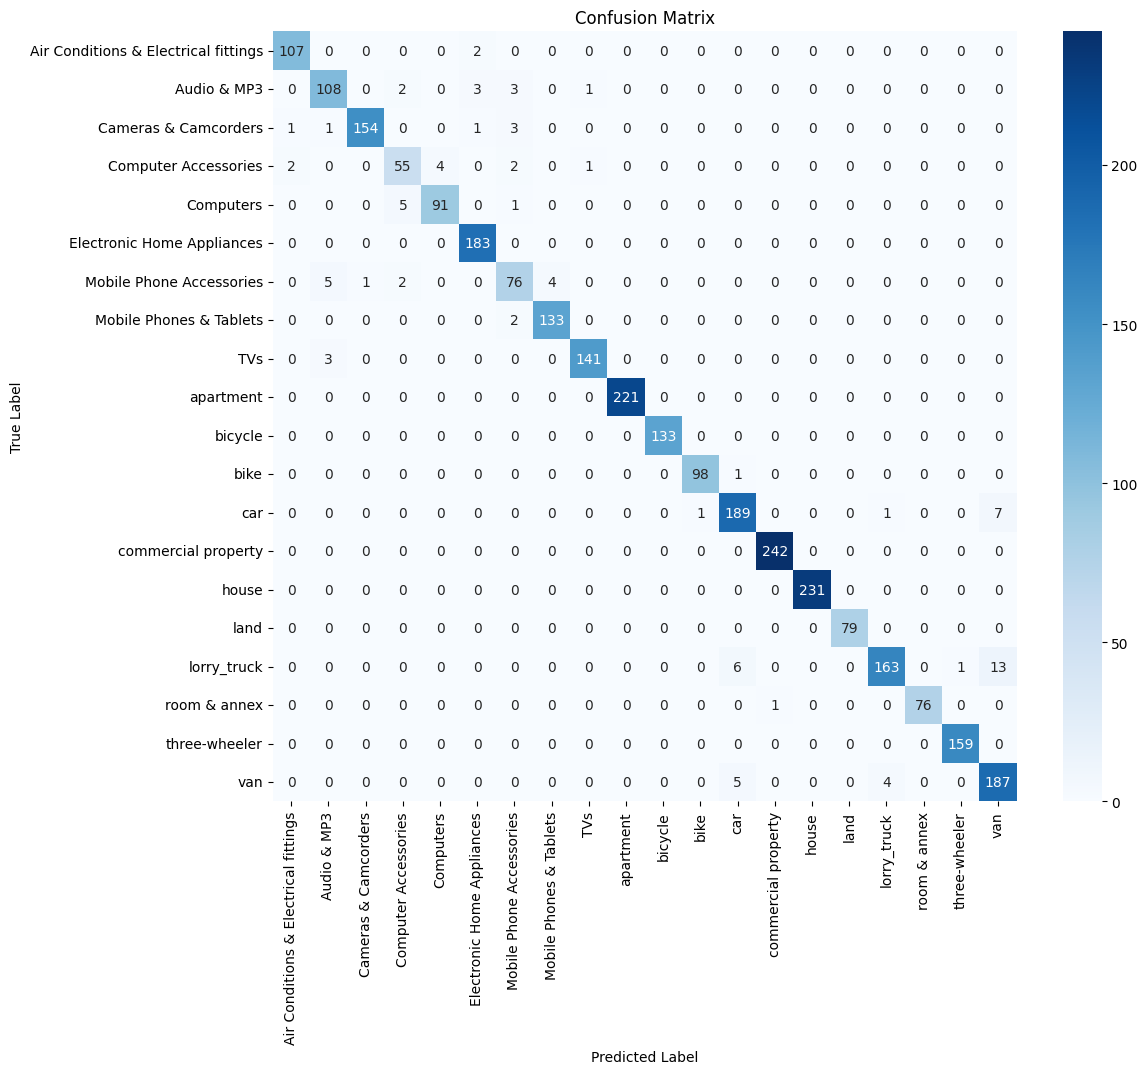

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(label_encoder.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import pickle

# Define the filename for the exported model
model_filename = 'catboost_model.pkl'

# Save the trained model to a file
with open(model_filename, 'wb') as f:
    pickle.dump(catboost_model, f)

print(f"CatBoost model exported successfully to '{model_filename}'")

CatBoost model exported successfully to 'catboost_model.pkl'
